# RENTAL DURATION PREDICTOR
### Project by [Razi Haider](https://www.linkedin.com/in/razi-h/)

## Loading and Inspecting the Data

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df_rental = pd.read_csv("rental_info.csv")

In [5]:
# Display the dataset
df_rental

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001


In [6]:
# Display descriptive statistics
print(df_rental.describe())

             amount  release_year   rental_rate        length  \
count  15861.000000  15861.000000  15861.000000  15861.000000   
mean       4.217161   2006.885379      2.944101    114.994578   
std        2.360383      2.025027      1.649766     40.114715   
min        0.990000   2004.000000      0.990000     46.000000   
25%        2.990000   2005.000000      0.990000     81.000000   
50%        3.990000   2007.000000      2.990000    114.000000   
75%        4.990000   2009.000000      4.990000    148.000000   
max       11.990000   2010.000000      4.990000    185.000000   

       replacement_cost         NC-17            PG         PG-13  \
count      15861.000000  15861.000000  15861.000000  15861.000000   
mean          20.224727      0.204842      0.200303      0.223378   
std            6.083784      0.403599      0.400239      0.416523   
min            9.990000      0.000000      0.000000      0.000000   
25%           14.990000      0.000000      0.000000      0.000000   


In [7]:
# Get the summary of the dataset
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


## Data Cleaning

In [9]:
# Check for missing values
print(df_rental.isnull().sum())

rental_date         0
return_date         0
amount              0
release_year        0
rental_rate         0
length              0
replacement_cost    0
special_features    0
NC-17               0
PG                  0
PG-13               0
R                   0
amount_2            0
length_2            0
rental_rate_2       0
dtype: int64


In [10]:
# Check for duplicate values 
print(df_rental.duplicated().sum())

0


## Data PreProcessing & Feature Engineering

In [12]:
# Add information on rental duration
df_rental["rental_length"] = pd.to_datetime(df_rental["return_date"]) - pd.to_datetime(df_rental["rental_date"])
df_rental["rental_length_days"] = df_rental["rental_length"].dt.days

In [13]:
# Add dummy variables
df_rental["deleted_scenes"] = np.where(df_rental["special_features"].str.contains("Deleted Scenes"), 1, 0)
df_rental["behind_the_scenes"] = np.where(df_rental["special_features"].str.contains("Behind the Scenes"), 1, 0)

In [14]:
# Choose columns to drop
cols_to_drop = ["special_features", "rental_length", "rental_length_days", "rental_date", "return_date"]

In [15]:
# Split into feature and target sets
X = df_rental.drop(cols_to_drop, axis=1)
y = df_rental["rental_length_days"]

In [16]:
# Further split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

## Lasso Regression

In [18]:
# Create the Lasso model
lasso = Lasso(alpha=0.3, random_state=9)

In [19]:
# Train the model and access the coefficients
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

In [20]:
# Perform feature selection by choosing columns with positive coefficients
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso_coef > 0], X_test.iloc[:, lasso_coef > 0]

In [21]:
# Run OLS models on lasso chosen regression
ols = LinearRegression()
ols.fit(X_lasso_train, y_train)
y_test_pred = ols.predict(X_lasso_test)
mse_lin_reg_lasso = mean_squared_error(y_test, y_test_pred)

In [22]:
# Print OLS MSE
print(f"MSE for Linear Regression (Lasso-selected features): {mse_lin_reg_lasso}")

MSE for Linear Regression (Lasso-selected features): 4.812297241276237


## Random Forest Regression

In [24]:
# Random forest hyperparameter space
param_dist = {'n_estimators': np.arange(1, 101, 1), 'max_depth': np.arange(1, 11, 1)}

In [25]:
# Create a random forest regressor
rf = RandomForestRegressor()

In [26]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, random_state=9)

In [27]:
# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
                   random_state=9)

In [28]:
# Create a variable for the best hyperparameters
hyper_params = rand_search.best_params_

In [29]:
# Run the random forest on the chosen hyperparameters
rf = RandomForestRegressor(n_estimators=hyper_params["n_estimators"], max_depth=hyper_params["max_depth"], random_state=9)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mse_random_forest = mean_squared_error(y_test, rf_pred)

In [30]:
# Print Random Forest MSE
print(f"MSE for Random Forest: {mse_random_forest}")

MSE for Random Forest: 2.225667528098759


## Best Model Selection

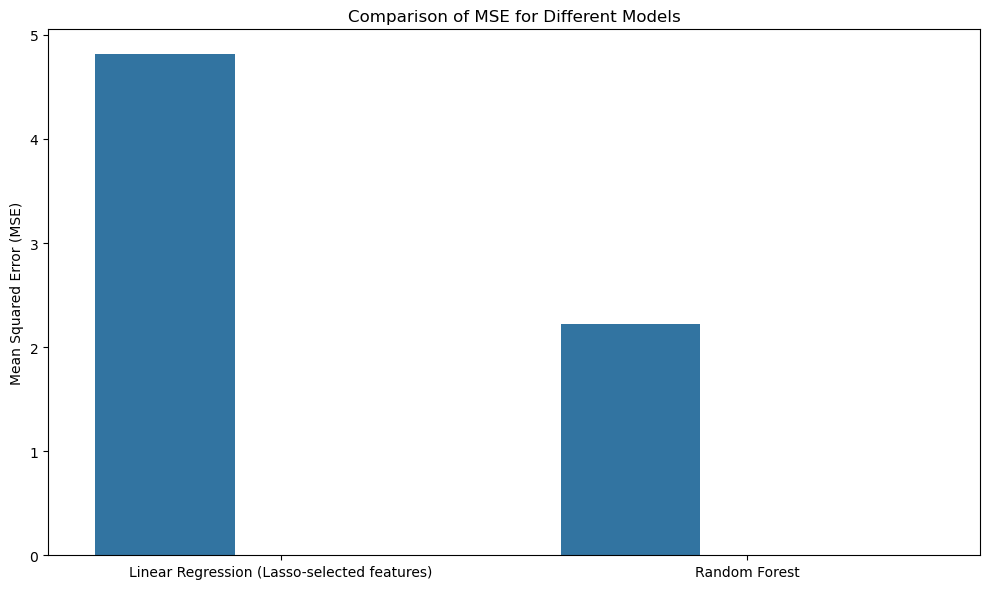

In [32]:
# MSE Comparison Bar Chart
mse_values = {
    "Linear Regression (Lasso-selected features)": mse_lin_reg_lasso,
    "Random Forest": mse_random_forest
}

# Adjust the figure size to make bars thinner
plt.figure(figsize=(10, 6))

# Create bar plot
ax = sns.barplot(x=list(mse_values.keys()), y=list(mse_values.values()))

# Adjust bar width by manually setting the width of each bar
for patch in ax.patches:
    patch.set_width(0.3)  # Adjust this value to make the bars thinner or thicker

plt.title("Comparison of MSE for Different Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.tight_layout()
plt.show()


In [33]:
# Determine the best model based on MSE
if mse_random_forest < mse_lin_reg_lasso:
    print(f"Best Model: Random Forest with MSE = {mse_random_forest}")
else:
    print(f"Best Model: Linear Regression (Lasso-selected features) with MSE = {mse_lin_reg_lasso}")

Best Model: Random Forest with MSE = 2.225667528098759
